In [1]:
import sys
import pandas
import pywtk.site_lookup as site_lookup
import pywtk.wtk_api
from shapely import wkb
from shapely.geometry import Point
from shapely.geometry import shape
import pylab as P
import numpy as N

In [2]:
# Define start and end dates for timeseries
startTime = pandas.Timestamp('2008-01-01 00:00:00').tz_localize('US/Pacific')
endTime = pandas.Timestamp('2008-12-31 23:55:00').tz_localize('US/Pacific')

In [3]:
# Import node locations (Use GetWtkSitesAndScaling to build this data frame)
siteInfoDf=pandas.read_csv("data/siteInfo.csv")
siteInfoDf

,Plexos Node ID,capacity,rtsLong,rtsLat,the_geom,region
0,317,796.3,-116.324347,32.818864,0101000000f0822d1bc2145dc07d42b089d0684040,32
1,309,148.3,-118.043550,35.217543,01010000009f0f8585c9825dc068eb016fd89b4140,30
2,303,844.1,-117.055829,35.378433,0101000000bb29e5b592435dc0f6d4878170b04140,33
3,122,711.4,-118.127342,34.735758,0101000000105a0f5f26885dc0b38fdb502d5e4140,31


In [4]:
farm_power_list=[pandas.DataFrame()]*4

for i in range(len(siteInfoDf)):
    # import WTK sites from REEDS region corresponding to node location
    sites = pandas.read_csv("data/node_"+str(siteInfoDf["Plexos Node ID"][i])+"_WTK_sites.csv")
    
    # import the fist timeseries to initialize the aggregate timeseries
    windData = pywtk.wtk_api.get_wind_data(sites["site_id"][0],startTime,endTime,attributes=["power"])
    
    # Aggregate the rest of the timeseries
    for j in range(1,len(sites)):
        windData += pywtk.wtk_api.get_wind_data(sites["site_id"][j],startTime,endTime,attributes=["power"])
    
    # compute the differences
    windData['power change']=windData['power'].diff(periods=1).shift(periods=-1,axis=0)
    windData=windData.dropna()
    windData['hour'] = [ts.hour for ts in windData.index]
    windData['Plexos node ID']=[siteInfoDf["Plexos Node ID"][i] for k in range(len(windData))]
    
    # append to a list of all the farms
    farm_power_list[i] = windData
    
    print("Finished with bus: "+str(siteInfoDf["Plexos Node ID"][i]))

IOError: Unable to open file (Unable to open file: name = '/projects/hpc-apps/wtk/data/hdf/wtk_2008.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

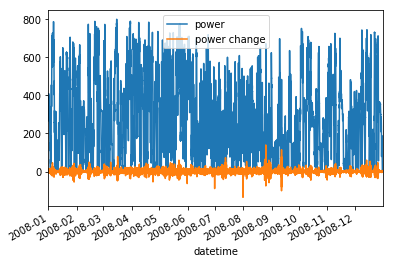

In [6]:
farm_power_list[0].loc[:,['power','power change']].plot()
P.show()